<div class="alert alert-block alert-info">
<font size="5", color = "black"><b>Сборный проект №1: Интернет-магазин компьютерных игр "Стримчик"</b></font>     
</div>

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

<div class="alert alert-block alert-info">
    
**1. Открываем файл и изучаем общую информацию**
    
</div>

In [1]:
#импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#загружаем данные из файла

data = pd.read_csv('/datasets/games.csv')

In [3]:
#выводим на экран таблицу

display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
#выводим на экран общую информацию о полученном датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#выводим верхнеуровневую статистическую информцию

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#определим, в каких столбцах есть пропуски

print(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [7]:
# проверяем

def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Name,0.0
Genre,0.0
Platform,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0


<div class="alert alert-block alert-info">
    
**2. Подготавливаем данные**
    
</div>

In [10]:
#привели к нижнему регистру заголовки

data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
#удалим строки с пропусками в колонках name, year_of_release и genre. Проверим данные строки на наличие крупных продаж

display(data[data['name'].isna()])
display(data[data['genre'].isna()])
data[data['year_of_release'].isna()].query('(na_sales+eu_sales+jp_sales+other_sales) >= 5')# 1 строка соответсвует (меньше 6 млн в сумме). Можем удалаять

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E


In [13]:
#удаляем пропуски в столбцах name, year_of_release, genre

data.dropna(subset=['name'], inplace=True)

In [14]:
#удаляем пропуски в столбцах year_of_release

data.dropna(subset=['year_of_release'], inplace=True)

In [15]:
#удаляем пропуски в столбцах genre

data.dropna(subset=['genre'], inplace=True)

In [16]:
#заменяем данные NaN и 'tbd' на 1000

#в колонке critic_score заменяем незаполненные значения на 1000 

data['critic_score'] = data['critic_score'].fillna(1000)

#в колонке user_score заменяем незаполненные значения на 1000 

data['user_score'] = data['user_score'].fillna(1000)

#в колонке rating заменяем незаполненные значения на 1000 

data['rating'] = data['rating'].fillna(1000)

#в колонке user_score заменяем значения 'tbd' на 1000

data.loc[data['user_score'] == 'tbd', 'user_score'] = 1000

#проверяем

display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,1000.0,1000,1000
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,1000.0,1000,1000


In [17]:
#меняем тип данных
        
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')

#user_score меняем тип данных с object на float

data['user_score'] = data['user_score'].astype('float')

#переведем значения продаж из разрядов млн в тыс.

data['na_sales'] = data['na_sales']*1000
data['eu_sales'] = data['eu_sales']*1000
data['jp_sales'] = data['jp_sales']*1000
data['other_sales'] = data['other_sales']*1000

#проверяем

data.info()
display(data.query('platform=="PS4"').head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030.0,5860.0,360.0,2380.0,1000,1000.0,1000
42,Grand Theft Auto V,PS4,2014,Action,3960.0,6310.0,380.0,1970.0,97,8.3,M
77,FIFA 16,PS4,2015,Sports,1120.0,6120.0,60.0,1280.0,82,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2990.0,3490.0,220.0,1280.0,1000,1000.0,1000
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2810.0,3480.0,140.0,1230.0,83,5.7,M
94,FIFA 17,PS4,2016,Sports,660.0,5750.0,80.0,1110.0,85,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,2530.0,3270.0,240.0,1130.0,87,6.5,M
143,FIFA 15,PS4,2014,Sports,800.0,4330.0,50.0,900.0,82,5.7,E
154,Destiny,PS4,2014,Shooter,2490.0,2070.0,160.0,920.0,76,6.1,T
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1850.0,2500.0,190.0,850.0,93,7.9,T


In [18]:
#в колонке rating заменяем значения 'E' на 1

data.loc[data['rating'] == 'E', 'rating'] = 1

#в колонке rating заменяем значения 'K-A' на 1

data.loc[data['rating'] == 'K-A', 'rating'] = 1

#в колонке rating заменяем значения 'M' на 17

data.loc[data['rating'] == 'M', 'rating'] = 17

#в колонке rating заменяем значения 'M' на 13

data.loc[data['rating'] == 'T', 'rating'] = 13

#в колонке rating заменяем значения 'E10+' на 10

data.loc[data['rating'] == 'E10+', 'rating'] = 10

#в колонке rating заменяем значения 'AO' на 18

data.loc[data['rating'] == 'AO', 'rating'] = 18

#в колонке rating заменяем значения 'EC' на 3

data.loc[data['rating'] == 'EC', 'rating'] = 3

#в колонке rating заменяем значения 'RP' на 20

data.loc[data['rating'] == 'RP', 'rating'] = 20

In [19]:
#посчитаем суммарные продажи во всех регионах в отдельном столбце

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#проверяем

display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360.0,28960.0,3770.0,8450.0,76,8.0,1,82540.0
1,Super Mario Bros.,NES,1985,Platform,29080.0,3580.0,6810.0,770.0,1000,1000.0,1000,40240.0
2,Mario Kart Wii,Wii,2008,Racing,15680.0,12760.0,3790.0,3290.0,82,8.3,1,35520.0
3,Wii Sports Resort,Wii,2009,Sports,15610.0,10930.0,3280.0,2950.0,80,8.0,1,32770.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270.0,8890.0,10220.0,1000.0,1000,1000.0,1000,31380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,10.0,0.0,1000,1000.0,1000,10.0
16711,LMA Manager 2007,X360,2006,Sports,0.0,10.0,0.0,0.0,1000,1000.0,1000,10.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,10.0,0.0,1000,1000.0,1000,10.0
16713,Spirits & Spells,GBA,2003,Platform,10.0,0.0,0.0,0.0,1000,1000.0,1000,10.0


<div class="alert alert-info">

**Комментарии по подготовке данных**
    
***Пропуски***
    

Удалили пропуски в столбцах name, year_of_release, genre по причине их мало количества (менее 2% от общего объема).
В колонках critic_score, user_score, rating пропуски не удаляли: большая доля. Заменили пропуски, а также значение "tbd" на целочисленное значение 1000. Значение 'tbd' мы приняли равным значению 'NaN', поэтому обработали их одинаково.  

Причинами пропусков стали: отсутвие оценок пользователей/критиков по тем или иным играм, потери при объединении данных либо технические сбои.

***Общие комментарии***

В колонке 'rating' строчные значения рейтинга поменяли на цифровые по аналогии с возрастом, разрешенным для игр. 
living_area.
Поменяли тип данных в колонке year_of_release на целочисленные значения. 
В колонке user_score поменяли тип данных на float: цифровые данные с разрядностью после запятой (предварительно были object).
Добавили колонку 'total_sales' в которой отразили совокупную сумму продаж всех регионов. 
    
</div>

<div class="alert alert-block alert-info">
    
**3. Исследовательский анализ данных**
    
</div>

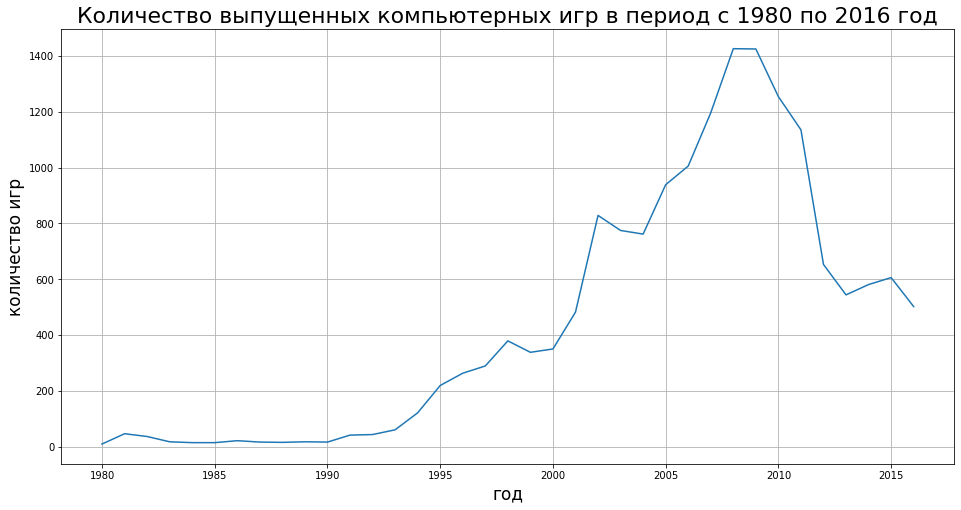

year_of_release
2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: name, dtype: int64


In [20]:
#сгруппиурем и отсортируем данные, чтобы понять, сколько игр выпускалось в разные годы

games_by_year=data.groupby('year_of_release').count().sort_values(by='year_of_release',ascending=False)['name']

#построим линейный график динамики ежегодного выпуска игр 

f, ax = plt.subplots()
plt.plot(games_by_year)

ax.set_xlabel('год',
             fontsize = 17)
ax.set_ylabel(
              'количество игр',
               fontsize = 17
              )
ax.grid()
ax.set_title('Количество выпущенных компьютерных игр в период с 1980 по 2016 год',fontsize = 22)
f.set_size_inches(16,8)
plt.show()

#выведем на экран ежегодное количество выпуска игр

print(games_by_year)

In [21]:
#выберим платформы для оценки суммарных продажами

data_platform_sales = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')

#выведем на экран платформы, отсортироанные по количеству продаж от большего к меньшему за время наблюдений

display(data_platform_sales.sort_values(by='total_sales',ascending=False))

,total_sales
platform,
PS2,1233560.0
X360,961240.0
PS3,931340.0
Wii,891180.0
DS,802780.0
PS,727580.0
PS4,314140.0
GBA,312880.0
PSP,289530.0


In [22]:
#выберим платформы с наибольшими суммарными продажами (топ-11) и построим распределение по годам

data_platform_sales_top = data.query('platform == "PS2" or platform =="X360" or platform =="PS3" or platform =="Wii" or platform =="DS" or platform =="PS" or platform =="PS4" or platform =="GBA" or platform =="PSP" or platform =="3DS" or platform == "PC"').pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')

#выведем на экран данные с использованием градиента

display(data_platform_sales_top.style.format("{:.0f}").background_gradient())

platform,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,,
1985,nan,20,nan,40,nan,nan,nan,nan,nan,nan,nan
1988,nan,nan,nan,30,nan,nan,nan,nan,nan,nan,nan
1992,nan,nan,nan,3030,nan,nan,nan,nan,nan,nan,nan
1994,nan,nan,nan,12870,6030,nan,nan,nan,nan,nan,nan
1995,nan,nan,nan,4220,35960,nan,nan,nan,nan,nan,nan
1996,nan,nan,nan,10580,94700,nan,nan,nan,nan,nan,nan
1997,nan,nan,nan,11270,136170,nan,nan,nan,nan,nan,nan
1998,nan,nan,nan,3260,169490,nan,nan,nan,nan,nan,nan
1999,nan,nan,nan,4740,144530,nan,nan,nan,nan,nan,nan


<div class="alert alert-info">

***За какой характерный срок появляются новые и исчезают старые платформы?***

В среднем существование платформ длится от 8 до 12 лет.  Медиана равна 10 годам.
    
</div>

In [23]:
#построим df по продажам в разрезе платформ после 2010 года

data_platform_year_sales = data.query('year_of_release >= 2010').pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')

#выведем на экран данные с использованием градиента

display(data_platform_year_sales.style.format("{:.1f}").background_gradient())

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,nan,85020.0,24280.0,5640.0,142170.0,nan,35040.0,nan,127950.0,nan,170030.0,nan
2011,63200.0,26180.0,35030.0,450.0,156780.0,nan,17820.0,4630.0,59650.0,nan,143840.0,nan
2012,51360.0,11010.0,23220.0,nan,107360.0,nan,7690.0,16190.0,21710.0,17560.0,99740.0,nan
2013,56570.0,1540.0,12380.0,nan,113250.0,25990.0,3140.0,10590.0,8590.0,21650.0,88580.0,18960.0
2014,43760.0,nan,13280.0,nan,47760.0,100000.0,240.0,11900.0,3750.0,22030.0,34740.0,54070.0
2015,27780.0,nan,8520.0,nan,16820.0,118900.0,120.0,6250.0,1140.0,16350.0,11960.0,60140.0
2016,15140.0,nan,5250.0,nan,3600.0,69250.0,nan,4250.0,180.0,4600.0,1520.0,26150.0


In [25]:
data_platform_year_sales.columns

Index(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'],
      dtype='object', name='platform')

<div class="alert alert-info">

***Какие платформы лидируют по продажам, растут или падают?***

С 2014 по 2016 гг платформы PS4 и Xone лидируют по продажам. За год после появления данные платформы превзошли по продажам платформы предыдущих поколений (PS3 и X360).
Наблюдаем общий тренд снижения продаж по всем платформам с 2010 года. Скорее всего связано с миграцией игровой индустрии на мобильные устройства. 

Топ-3 платформы можно считать потецниально прибыльными: PS4, Xone и PS2.
</div>

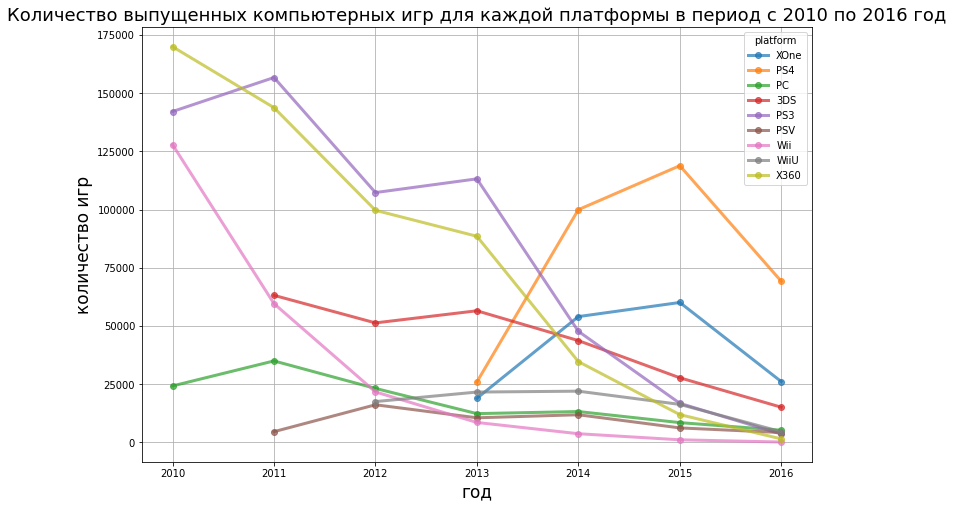

In [26]:
# построим линейный график динамики ежегодного выпуска игр в разрезе платформ

data_platform_year_sales[['XOne', 'PS4', 'PC', '3DS', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360']].plot(
    style = 'o-',    
    linewidth=3,
    alpha=0.7,
    label=['XOne', 'PS4', 'PC', '3DS', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360'],
    figsize=(12, 8), 
    grid=True,
    legend=True
)
plt.xlabel(
             'год',
             fontsize = 17
             )
plt.ylabel(
              'количество игр',
               fontsize = 17
              )
plt.title('Количество выпущенных компьютерных игр для каждой платформы в период с 2010 по 2016 год', fontsize = 18)
plt.show()

Text(0, 0.5, 'Количество продаж')

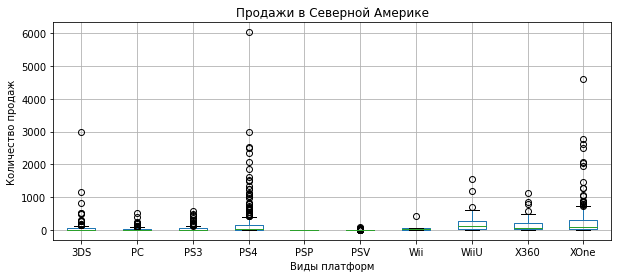

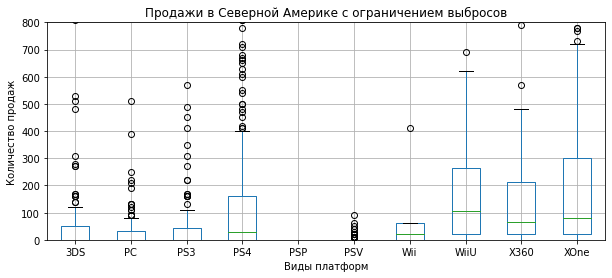

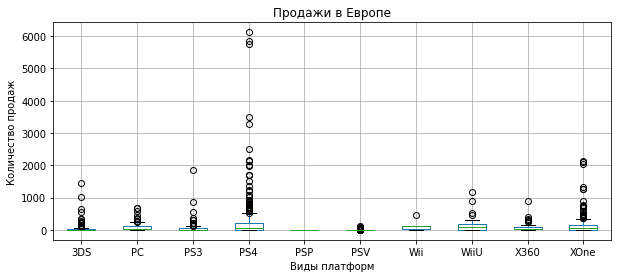

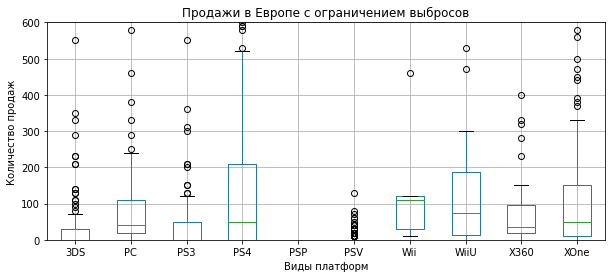

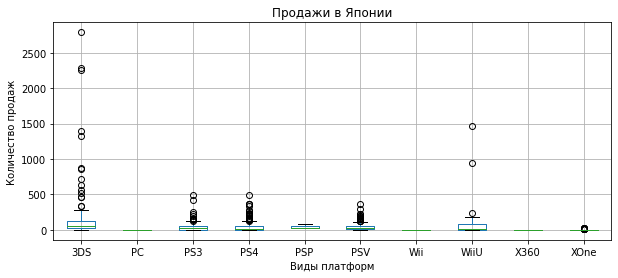

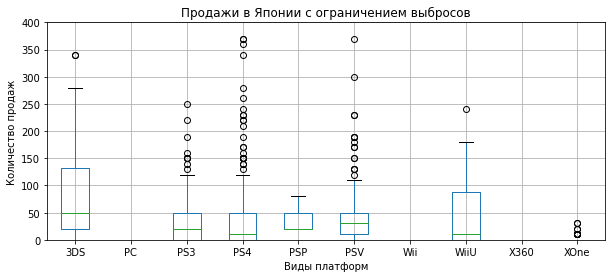

In [27]:
#построим df по продажам в разрезе платформ после 2015 года

data_platform_year_sales_na = data.query('year_of_release >= 2015').pivot_table(index=['name'], columns='platform', values='na_sales', aggfunc='sum')
data_platform_year_sales_eu = data.query('year_of_release >= 2015').pivot_table(index=['name'], columns='platform', values='eu_sales', aggfunc='sum')
data_platform_year_sales_jp = data.query('year_of_release >= 2015').pivot_table(index=['name'], columns='platform', values='jp_sales', aggfunc='sum')

#выведим график «ящик с усами» по продажам в СА игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ выбросов

data_platform_year_sales_na.plot(kind='box', figsize=(10, 4),title='Продажи в Северной Америке', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в СА игр в разбивке по платформам с ОГРАНИЧЕНИЕМ выбросов

data_platform_year_sales_na.plot(kind='box', figsize=(10, 4), ylim=(0,800),title='Продажи в Северной Америке с ограничением выбросов', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Европе игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ выбросов

data_platform_year_sales_eu.plot(kind='box', figsize=(10, 4), title='Продажи в Европе', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Европе игр в разбивке по платформам с ОГРАНИЧЕНИЕМ выбросов

data_platform_year_sales_eu.plot(kind='box', figsize=(10, 4), ylim=(0,600), title='Продажи в Европе с ограничением выбросов', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Японии игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ выбросов

data_platform_year_sales_jp.plot(kind='box', figsize=(10, 4), title='Продажи в Японии', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Японии игр в разбивке по платформам с ОГРАНИЧЕНИЕМ выбросов

data_platform_year_sales_jp.plot(kind='box', figsize=(10, 4), ylim=(0,400), title='Продажи в Японии с ограничением выбросов', grid=True)
plt.xlabel('Виды платформ')
plt.ylabel('Количество продаж')

<div class="alert alert-info">

# Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Использовали данные с 2010 года для построения динамик продаж в разрезе платформ (на длительном периоде лучше видны тренды) и данные с **2015** года для построения диаграмм размаха в разрезе регионов (на коротком периоде лучше строить актуальные статистические модели).
Потенциально популярными платформами на 2017 год остаются Playstation4, XOne, 3DS, WiiU и PC.
    
## Playstation4

### Северная Америка

Медиана продаж одной игры в СА составляет 30 тыс копий. PS 4 по медиане занимает 4-е место на рынке СА и уступает платформам XOne, X360 и WiiU. При этом разбег между 3-м и 1-м квартилем у PS4 меньше по сравнению с лидерами продаж. Большое количество выбросов вверх и длинные усы, говорят об успехаха продаж отдельных проектов на данном рынке. 

### Европа

PS 4 занимает по медиане 2-е место на рынке Европы, уступая WiiU. PS 4 является следующим поколением после платформы PS 3. Медиана продаж в Европе составляет чуть менее 50 тыс копий. При этом у PS 4 более высокие значение у 3-го квартиля и максимальные значения у "усов", 210 и 520 тыс соответсвенно. длинные усы, а также  по объему продаж значительно превосходит конкурентов (например, в 4 раза ближайшего конкурента XOne).
    
### Япония

В Японии медина продаж PS4 устпает 4-м лидерам, но при это распределение имеет такие же особенности, как и в других регионах (выбросы и вытянутые усы вверх). Нельзя не отметить, что размах минимальный по данной платформе и составляет 50 тыс. копий (в 3-4 раза меньше чем в СА и Европе). 

## XOne

### Северная Америка

XOne обгоняет по продажам своего предшественника X360 (разница в медианах составляет более чем в 15 тыс копий, и разница пости в 100 тыс между 75-ми квартилями указанных платформ). Медианное значение почти достигло рубеж в 50 тыс копий. У XOne размах составляет 290 тыс копий и является самым большим среди платформ. У XOne смещние медианы вниз (большее число игр с небольшим или средним количством продаж).

### Европа

В Европе продажи XOne по медиане уступает продажам WiiU более чем на 20 тыс. копий. Размах между квартилями составляет 140 тыс. Большое количество выбросов и длинные усы (вверх) говорят об успехах отдельных проектов. Медиана смещена вниз: продажи зависят от большого количества игр с небольшим объемом продаж.
    
## 3DS

### Япония

Начнем с Японии, тк в данной стране продажи 3DS превосходят все остальные. Медиана составляет более 50 тыс копий, но при этом размах составляет более 100 тыс. копий. Значение 1-го квартиля 3 чуть менее 25 тыс копий. 

### СА и Европа

Продажи 3DS в СА и Европе держатся примерно на одном уровне, 3-й квартиль равен 30-40 тыс. копий соответственно при таком же размахе.

## WiiU

### Северная Америка

Медиана продаж одной игры в СА составляет 100 тыс копий. WiiU по медиане занимает 1-е место на рынке СА. При этом разбег между 3-м и 1-м квартилем составляет 265 тыс и является одним из самых высоких. Длинные усы, говорят об успехаха продаж отдельных проектов на данном рынке. 

### Европа

WiiU занимает по медиане 1-е место на рынке Европы. Медиана продаж в Европе составляет чуть менее 80 тыс копий. У WiiU  высокие значение размах равное 180 тыс.
    
### Япония

В Японии медина продаж WiiU составляет 10 тыс копий и сильно смещена вниз. Размах минимальный по данной платформе и составляет 85 тыс. копий (в 2-3 раза меньше чем в СА и Европе). 

## PC

### Европа

PC занимает 4-е место по медиане в Европе и равна 40 тыс. копий. Размах равен 85 тыс. копий.

### Вывод

Пять платформ Playstation4, XOne, 3DS, WiiU и PC лидирует по продажам в рассматриваемых регионах. Остаются риски высокой дисперсии для платформ, что является нормальным фактором риска в высокотехнологичной сфере, но при этом рассматривая средние и минимальные значения можно говорить о заделе на 2017 году по удержанию лидерских позиций по продажам, но при этом сохраняя в целом тренд по снижению продаж среди всех платформ и миграцией сферы игровой индустрии на мобильные устройства. 

</div>

Text(0, 0.5, 'Оценка критиков')

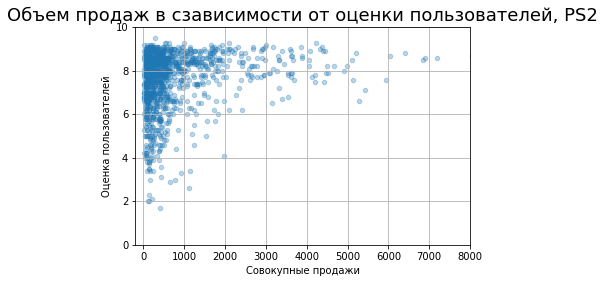

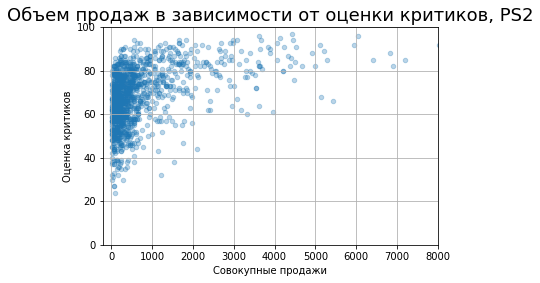

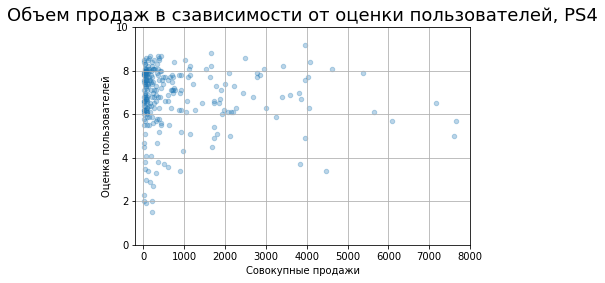

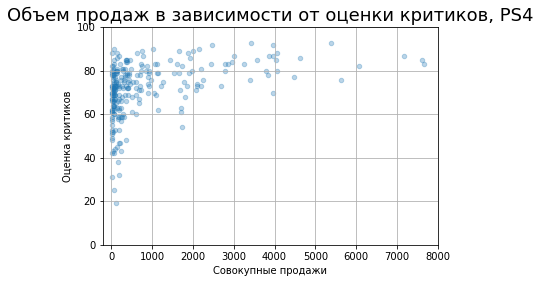

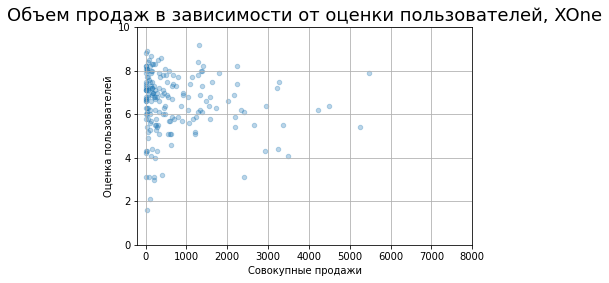

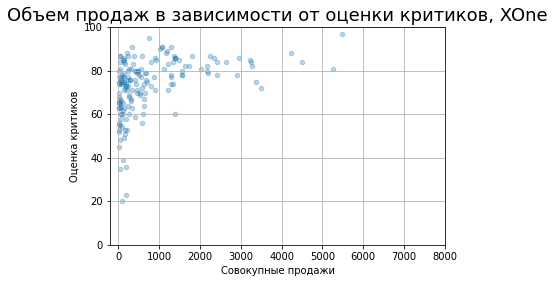

In [29]:
#постройте диаграмму рассеяния и посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
#выбрали платформу PS2
#сформировали выборку для платформаы PS2

data_ps2=data.query('platform == "PS2"')

#построили диаграмму рассеяния продаж PS2 и отзывов пользователей 

data_ps2.plot(x='total_sales', 
              y='user_score', 
              ylim=(0,10), 
              xlim=(-200,8000), 
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)

plt.title('Объем продаж в сзависимости от оценки пользователей, PS2', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка пользователей')

#построили диаграмму рассеяния продаж PS2 и отзывов критиков

data_ps2.plot(x='total_sales', 
              y='critic_score', 
              ylim=(0,100), 
              xlim=(-200,8000),
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)
plt.title('Объем продаж в зависимости от оценки критиков, PS2', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка критиков')

#сформировали выборку для платформаы PS4

data_ps2=data.query('platform == "PS4"')

#построили диаграмму рассеяния продаж PS4 и отзывов пользователей 

data_ps2.plot(x='total_sales', 
              y='user_score', 
              ylim=(0,10), 
              xlim=(-200,8000), 
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)

plt.title('Объем продаж в сзависимости от оценки пользователей, PS4', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка пользователей')

#построили диаграмму рассеяния продаж PS4 и отзывов критиков

data_ps2.plot(x='total_sales', 
              y='critic_score', 
              ylim=(0,100), 
              xlim=(-200,8000),
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)
plt.title('Объем продаж в зависимости от оценки критиков, PS4', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка критиков')

#сформировали выборку для платформаы XOne

data_ps2=data.query('platform == "XOne"')

#построили диаграмму рассеяния продаж XOne и отзывов пользователей 

data_ps2.plot(x='total_sales', 
              y='user_score', 
              ylim=(0,10), 
              xlim=(-200,8000), 
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)

plt.title('Объем продаж в зависимости от оценки пользователей, XOne', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка пользователей')

#построили диаграмму рассеяния продаж XOne и отзывов критиков

data_ps2.plot(x='total_sales', 
              y='critic_score', 
              ylim=(0,100), 
              xlim=(-200,8000),
              kind='scatter', 
              alpha=0.3, 
              figsize=(6, 4),
              grid=True)
plt.title('Объем продаж в зависимости от оценки критиков, XOne', fontsize = 18)
plt.xlabel('Совокупные продажи')
plt.ylabel('Оценка критиков')

<div class="alert alert-info">

***Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?***

На основе анализа связи оценко пользователей и критиков с объемом продаж платформ PS2, PS4 и XOne видно, что отзывы как пользователей, так и критиков положительно влияют на объемы продаж. 
Оценки критиков оказывают на продажи более сильное воздействие нижели оценки пользователей. Тем не менее, не все высокие оценки приводят к увеличению продаж.

</div>

In [32]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360.0,28960.0,3770.0,8450.0,76,8.0,1,82540.0
1,Super Mario Bros.,NES,1985,Platform,29080.0,3580.0,6810.0,770.0,1000,1000.0,1000,40240.0
2,Mario Kart Wii,Wii,2008,Racing,15680.0,12760.0,3790.0,3290.0,82,8.3,1,35520.0
3,Wii Sports Resort,Wii,2009,Sports,15610.0,10930.0,3280.0,2950.0,80,8.0,1,32770.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270.0,8890.0,10220.0,1000.0,1000,1000.0,1000,31380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,10.0,0.0,1000,1000.0,1000,10.0
16711,LMA Manager 2007,X360,2006,Sports,0.0,10.0,0.0,0.0,1000,1000.0,1000,10.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,10.0,0.0,1000,1000.0,1000,10.0
16713,Spirits & Spells,GBA,2003,Platform,10.0,0.0,0.0,0.0,1000,1000.0,1000,10.0


Жанры, осортированные по количеству проданных копий
               count        sum
genre                         
Action         3307  1716520.0
Sports         2306  1309670.0
Shooter        1296  1041360.0
Role-Playing   1481   931080.0
Platform        878   825550.0
Misc           1721   790290.0
Racing         1226   723490.0
Fighting        837   442660.0
Simulation      857   387960.0
Puzzle          569   239890.0
Adventure      1293   233330.0
Strategy        673   172570.0


<AxesSubplot:xlabel='genre'>

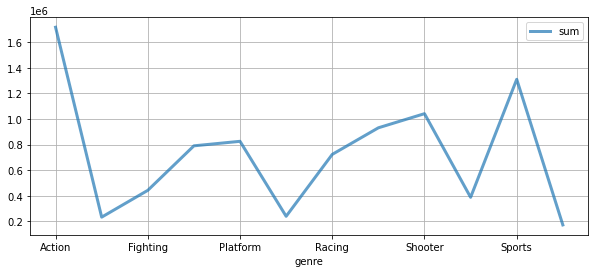

In [33]:
#посмотрим на общее распределение игр по жанрам

#сформируем выборку по жанрам и соответсвующему количеству продаж

data_genre_total_sales = data.pivot_table(index=['genre'], values='total_sales',aggfunc=['count','sum'])

#поменяем название столюцов на count и sum

data_genre_total_sales.columns = ['count','sum']

#выведем на экран жанры, осортированные по количеству проданных копий

print("Жанры, осортированные по количеству проданных копий\n", data_genre_total_sales.sort_values(by="sum",ascending=False)), 

#построим график совокупных продаж в разрезе жанров игр 

data_genre_total_sales['sum'].plot(
    kind='line',
    x='genre',
    y='total_sales',
    linewidth=3,
    alpha=0.7,
    label='sum',
    grid=True,
    legend=True,
    figsize=(10, 4),
)


Text(0, 0.5, 'Количество продаж')

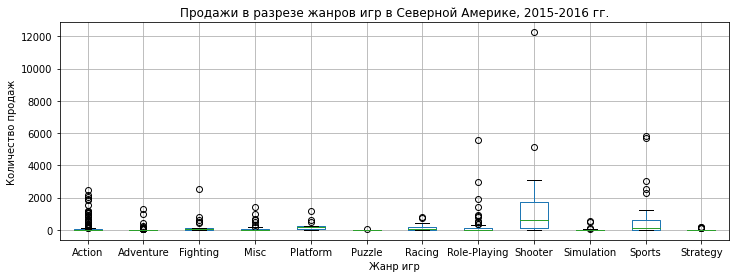

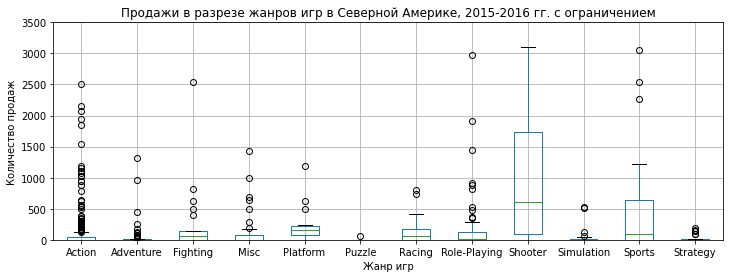

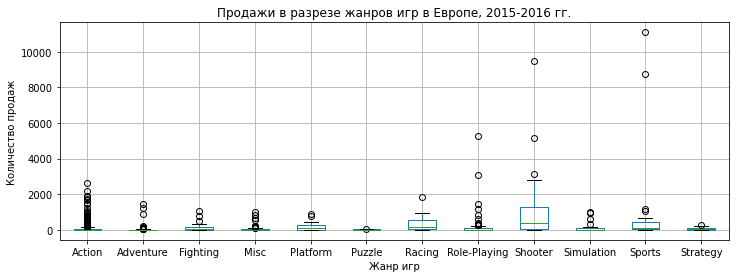

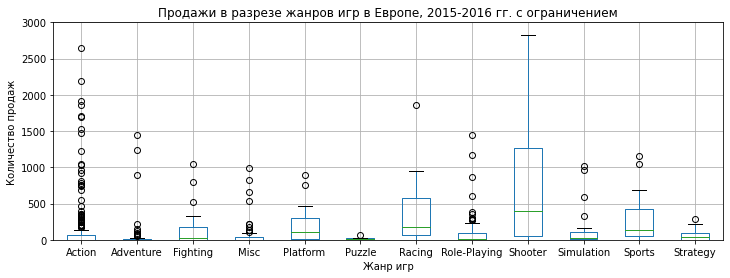

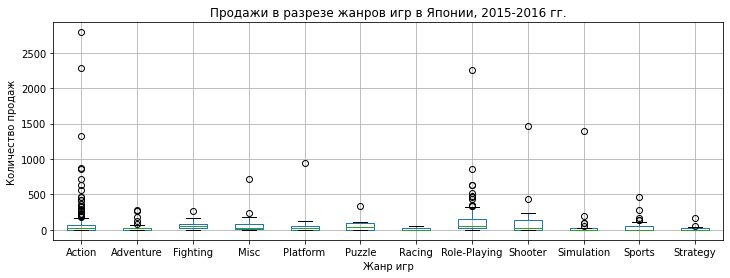

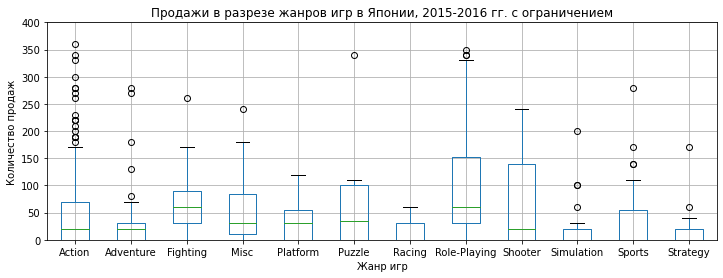

In [34]:
#построим df по продажам в разрезе жанров после 2015 года

data_platform_year_sales_na2 = data.query(
    'year_of_release >= 2015').pivot_table(index=['name'], 
    columns='genre', values='na_sales', 
    aggfunc='sum')

data_platform_year_sales_eu2 = data.query(
    'year_of_release >= 2015').pivot_table(index=['name'], 
     columns='genre', values='eu_sales', 
     aggfunc='sum')

data_platform_year_sales_jp2 = data.query(
    'year_of_release >= 2015').pivot_table(index=['name'], 
     columns='genre', values='jp_sales', 
     aggfunc='sum')

#выведим график «ящик с усами» по продажам в СА игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ

data_platform_year_sales_na2.plot(kind='box', figsize=(12, 4), 
                                  title='Продажи в разрезе жанров игр в Северной Америке, 2015-2016 гг.', grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в СА игр в разбивке по платформам С ОГРАНИЧЕНИЕМ

data_platform_year_sales_na2.plot(kind='box', figsize=(12, 4), ylim=(0,3500),
                                  title='Продажи в разрезе жанров игр в Северной Америке, 2015-2016 гг. с ограничением', 
                                  grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Европе игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ

data_platform_year_sales_eu2.plot(kind='box', figsize=(12, 4), 
                                  title='Продажи в разрезе жанров игр в Европе, 2015-2016 гг.', grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Европе игр в разбивке по платформам С ОГРАНИЧЕНИЕМ

data_platform_year_sales_eu2.plot(kind='box', figsize=(12, 4), ylim=(0,3000),
                                  title='Продажи в разрезе жанров игр в Европе, 2015-2016 гг. с ограничением', grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Японии игр в разбивке по платформам БЕЗ ОГРАНИЧЕНИЯ

data_platform_year_sales_jp2.plot(kind='box', figsize=(12, 4), 
                                  title='Продажи в разрезе жанров игр в Японии, 2015-2016 гг.', grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

#выведим график «ящик с усами» по продажам в Японии игр в разбивке по платформам С ОГРАНИЧЕНИЕМ

data_platform_year_sales_jp2.plot(kind='box', figsize=(12, 4), ylim=(0,400), 
                                  title='Продажи в разрезе жанров игр в Японии, 2015-2016 гг. с ограничением', grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Количество продаж')

<div class="alert alert-info">

# Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Самые прибыльные жанры

Top-4 самых прибыльных жанра - это  Shooter, Action, Sports  и RPG. 
    
### Жанр Shooter
    
Лидирует в Северной Америке. Медиана равна 20 млн копий, размах 9 млн, разница между мин и макс составляет 20 млн. Медиана немного смещена к 1-му квартилю. В Европе медиана у данного жанра равна 11 млн и сильно смещена к 1-му квартилю (продается много игр с небольшим или средним объемом продаж за счет большого количества новых игр), размах 7 млн, разница между мин и макс составляет 8 млн. 

### Жанр Action

Лидирует в Европе. Медиана равна 18 млн и сильно смещена к 3-му квартилю (большие объем продаж у небольшого количества наиболее удачных проектов), размах составляет 9 млн, минимальное значение чуть менее 5 млн, макимальное - 22 млн. В СА медиана составляет 12 млн копий, размах 9 млн копий, минимум ноль, максимум - 19 млн копий.
    
### Жанр Sports

Медиана данного жанра что в Европе, что в СА находится на уровне 7 млн. Имеет относительно узкйи разброс 2 млн. 
    
### Жанр RPG

Буду в ранге топ 4-6 жанров в Европе и СА, данный жанр очень уверенно выбивается в лидеры в Японии. Медиана хоть с составляет 3 млн копий, но сильно смещена к 1-му квартилю. Размах составялет 8 млн, а максимально значение 11 млн.

### Низкодоходные жанры

Bottom-3 самых низкодоходных жанра - это  Puzzle, Adventure и Strategy. Puzzle и Strategy оказались в боттоме из-за низкого количества выпущенных игр, тогда как Adventure - из-за более низких продаж каждой отдельной игры. В сумме продажи игр данных жанров не смогли преодолеть планку в 2 млн копий.
    
## Вывод:
Action и Shooter являются лидерами как по количеству проданных копий, так и по количеству выпущенных игр и занимают в совокупности 55% доли на рынке. Жанр Shooter находится по количеству выпущенных игр на 5-м месте. Данному жанру удалось войти в top-3 благодаря более высокому количества продаж каждой отдельно взятой игры (2-е место среди всех жанров). RPG хоть и занимает высокую долю на рынке Японии, но имеет высокий размах и продажи реалзуются за счет мелких и средних продаж большого количества игр данного жанра. Жанр Sports имеет наиболее предсказуемый объем продаж с низким размахом.

</div>

<div class="alert alert-block alert-info">
    
**4. Составляем портрет пользователя каждого региона**
    
</div>

In [36]:
#cамые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

#сформируем выборку по видам платформ и соответсвующему количеству продаж копий в Северной Америке после 2015 года

data_platform_na_sales = data.query(
    'year_of_release >= 2015').pivot_table(index=['platform'], 
     values='na_sales',
     aggfunc='sum')

#поменяем название столюцов на sum

data_platform_na_sales.columns = ['sum']

#посчитаем долю продаж каждой платформы в Северной Америке

data_platform_na_sales_sum = data_platform_na_sales['sum'].sum()
data_platform_na_sales['share_%']=data_platform_na_sales['sum']/data_platform_na_sales_sum*100

#аналогично для Европы

data_platform_eu_sales = data.query('year_of_release >= 2015').pivot_table(index=['platform'], values='eu_sales',aggfunc='sum')

data_platform_eu_sales.columns = ['sum']
data_platform_eu_sales_sum = data_platform_eu_sales['sum'].sum()
data_platform_eu_sales['share_%']=data_platform_eu_sales['sum']/data_platform_eu_sales_sum*100

#аналогично для Японии

data_platform_jp_sales = data.query('year_of_release >= 2015').pivot_table(index=['platform'], values='jp_sales',aggfunc='sum')

data_platform_jp_sales.columns = ['sum']
data_platform_jp_sales_sum = data_platform_jp_sales['sum'].sum()
data_platform_jp_sales['share_%']=data_platform_jp_sales['sum']/data_platform_jp_sales_sum*100

#выведем на экран самые популярные платформы (топ-5) для пользователей регионов

display("Самые популярные платформы для пользователей Северной Америки", 
        data_platform_na_sales.sort_values(by='sum',ascending=False).head())
display("Самые популярные платформы для пользователей Европы", 
        data_platform_eu_sales.sort_values(by='sum',ascending=False).head())
display("Самые популярные платформы для пользователей Японии", 
        data_platform_jp_sales.sort_values(by='sum',ascending=False).head())

'Самые популярные платформы для пользователей Северной Америки'

,sum,share_%
platform,,
PS4,63860.0,42.071283
XOne,50300.0,33.137888
3DS,10310.0,6.792279
WiiU,8860.0,5.837012
X360,8050.0,5.303380


'Самые популярные платформы для пользователей Европы'

,sum,share_%
platform,,
PS4,83540.0,56.468839
XOne,28100.0,18.994187
PC,9100.0,6.151142
3DS,7390.0,4.995268
PS3,7300.0,4.934433


'Самые популярные платформы для пользователей Японии'

,sum,share_%
platform,,
3DS,23550.0,44.101124
PS4,12050.0,22.565543
PSV,8410.0,15.749064
PS3,4970.0,9.307116
WiiU,4120.0,7.715356


<div class="alert alert-info">

# Самые популярные платформы (топ-5). Опишите различия в долях продаж.

## Северная Америка 

В Северной Америке наиболее популярны платформы PS4 (доля на рынке - 42%), XOne - 33%, 3DS - 7%, WiiU - 6% и X360 - 5%. Платформы  XOne и X360 занимают наибольшую долю на рынке СА по сравнению с другими регионами. Как говорится, патриотические настрояения и маркетинг никто не отменял. 

## Европа

В Европе уверенно лидирует PS4 (56%), за ней с сильным отстованием идет платформа XOne - 18% и на 3-м месте PC - 6%, 3DS и PS3 по 5%. В Европе вкусы у потребителей более разнообразны и независимы.
    
## Япония

В Японии - лидерами являются платформы компаний Sony и Nintendo: 3DS - 44%, PS4 - 22%, PSV - 15%, PS3 - 9% и WiiU - 7%. Лидируют портативные устройства. Видимо японцы предпочитают проводить время за игрой не в стенах своих квартир (транспорт, парки, а может быть даже находят поиграть время на обеденном перерыве на работе). На японском рынке почти отсутствуют продажи платформ XOne.
    
Регионы отдают предпочтение местным производителям, но при этом в Японии предпочитают мобильные игровые платформы.


</div>

In [37]:
#cамые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

#сформируем выборку по жанрам и соответсвующему количеству продаж в Севернной Америке

data_genre_na_sales = data.query(
    'year_of_release >= 2015').pivot_table(index=['genre'], 
     values='na_sales',
     aggfunc='sum')

#поменяем название столюцов на sum

data_genre_na_sales.columns = ['sum']

#посчитаем долю продаж каждого жанра в Северной Америке

data_genre_na_sales_sum = data_genre_na_sales['sum'].sum()
data_genre_na_sales['share']=data_genre_na_sales['sum']/data_genre_na_sales_sum*100

#аналогично для Европы

data_genre_eu_sales = data.query(
    'year_of_release >= 2015').pivot_table(index=['genre'], 
     values='eu_sales',
     aggfunc='sum')
data_genre_eu_sales.columns = ['sum']
data_genre_eu_sales_sum = data_genre_eu_sales['sum'].sum()
data_genre_eu_sales['share']=data_genre_eu_sales['sum']/data_genre_eu_sales_sum*100

#аналогично для Японии

data_genre_jp_sales = data.query(
    'year_of_release >= 2015').pivot_table(index=['genre'], 
     values='jp_sales',
     aggfunc='sum')
data_genre_jp_sales.columns = ['sum']
data_genre_jp_sales_sum = data_genre_jp_sales['sum'].sum()
data_genre_jp_sales['share']=data_genre_jp_sales['sum']/data_genre_jp_sales_sum*100

#выведем на экран самые популярные жанры (топ-5) для пользователей регионов
#Северная Америка

data_genre_na_sales_sorted=data_genre_na_sales.query('share > 4.5').sort_values(by='sum',ascending=False)
display("Самые популярные жанры для пользователей Северной Америки", 
        data_genre_na_sales_sorted.head())

#Европа

data_genre_eu_sales_sorted=data_genre_eu_sales.query('share > 4.5').sort_values(by='sum',ascending=False)
display("Самые популярные жанры для пользователей Европы", 
        data_genre_eu_sales_sorted.head())

#Япония

data_genre_jp_sales_sorted=data_genre_jp_sales.query('share > 2.90').sort_values(by='sum',ascending=False)
display("Самые популярные жанры для пользователей Японии", 
        data_genre_jp_sales_sorted.head())

'Самые популярные жанры для пользователей Северной Америки'

,sum,share
genre,,
Shooter,48180.0,31.741221
Action,33680.0,22.188550
Sports,26310.0,17.333158
Role-Playing,19820.0,13.057514


'Самые популярные жанры для пользователей Европы'

,sum,share
genre,,
Shooter,40280.0,27.227254
Action,34820.0,23.536569
Sports,27820.0,18.804921
Role-Playing,17210.0,11.633094


'Самые популярные жанры для пользователей Японии'

,sum,share
genre,,
Action,23050.0,43.164794
Role-Playing,13410.0,25.112360
Shooter,3790.0,7.097378
Misc,3190.0,5.973783
Adventure,2220.0,4.157303


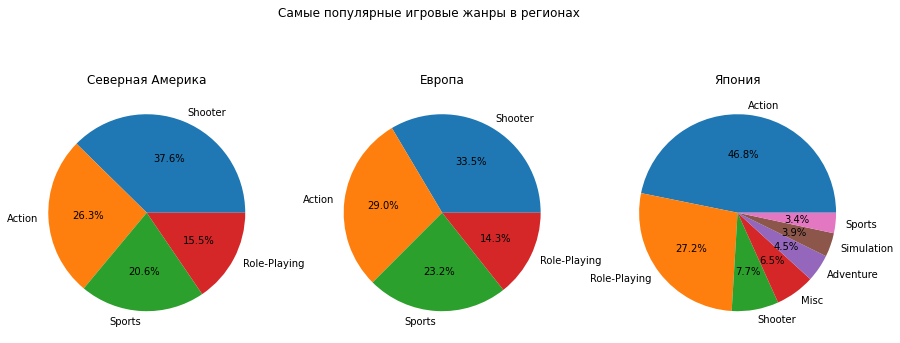

In [39]:
# построим круговые диаграммы для каждого региона

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Самые популярные игровые жанры в регионах')

plt.subplot(1, 3, 1)
plt.pie(data_genre_na_sales_sorted['share'], labels = data_genre_na_sales_sorted.index, autopct='%1.1f%%')
plt.title('Северная Америка')

plt.subplot(1, 3, 2)
plt.pie(data_genre_eu_sales_sorted['share'], labels = data_genre_eu_sales_sorted.index, autopct='%1.1f%%')
plt.title('Европа')

plt.subplot(1, 3, 3)
plt.pie(data_genre_jp_sales_sorted['share'], labels = data_genre_jp_sales_sorted.index, autopct='%1.1f%%')
plt.title('Япония')

plt.show()

<div class="alert alert-info">

# Самые популярные жанры (топ-5). Поясните разницу.

Северная Америка и Европа близки по предпотениям в жанрах игр: Action и Shooter "наше все" (суммарно на два жанра приходится доля 68% и 61% соответсвенно в СА и Европе). Тем не менее, жанр игр Shooter в СА по доле на рынке обходит на 7% долю на рынке Европы. В тройку лидеров по жанрам входят спортивные игры, доля которых, наоборот, в Европе на 8% выше, чем в СА. Японцы предпочитают RPG всем остальным жанрам (64%). Видимо, сказываются культурные различия населения, также как, возможно, любовь японцев к манге и аниме. Данный жанр в СА и Европе занимает лишь 4-е место (доля 10% в обоих регионах). Японцы тоже любят жанр Action, который занимает 2-е место среди жанров всех игр, но его доля составляет 17%, что почти в 2 раза меньше по сравнению с СА и Европой.

</div>

In [43]:
#влияет ли рейтинг ESRB на продажи в отдельном регионе?

#сформируем выборку по рейтингу ESRB и соответсвующему количеству продаж в Севернной Америке

data_esrb_na_sales = data.pivot_table(index=['rating'], values='na_sales',aggfunc=['count','sum'])

#поменяем название столюцов на sum

data_esrb_na_sales.columns = ['count','sum']

#посчитаем долю продаж, соответсвующего каждому значению рейтинга ESRB в Северной Америке

data_esrb_na_sales_sum = data_esrb_na_sales['sum'].sum()
data_esrb_na_sales['share_%']=data_esrb_na_sales['sum']/data_esrb_na_sales_sum*100

#аналогично для Европы

data_esrb_eu_sales = data.pivot_table(index=['rating'], values='eu_sales',aggfunc=['count','sum'])
data_esrb_eu_sales.columns = ['count','sum']
data_esrb_eu_sales_sum = data_esrb_eu_sales['sum'].sum()
data_esrb_eu_sales['share_%']=data_esrb_eu_sales['sum']/data_esrb_eu_sales_sum*100

#аналогично для Японии

data_esrb_jp_sales = data.pivot_table(index=['rating'], values='jp_sales',aggfunc=['count','sum'])
data_esrb_jp_sales.columns = ['count','sum']
data_esrb_jp_sales_sum = data_esrb_jp_sales['sum'].sum()
data_esrb_jp_sales['share_%']=data_esrb_jp_sales['sum']/data_esrb_jp_sales_sum*100

#выведем на экран рейтинг ESRB и соответствующие ему продажи для пользователей регионов

display("Влияние ESRB на продажи в Северной Америки", data_esrb_na_sales.sort_values(by='sum',ascending=False).head())
display("Влияние ESRB на продажи в Европе", data_esrb_eu_sales.sort_values(by='sum',ascending=False).head())
display("Влияние ESRB на продажи в Японии", data_esrb_jp_sales.sort_values(by='sum',ascending=False).head())

'Влияние ESRB на продажи в Северной Америки'

,count,sum,share_%
rating,,,
1,3924,1276800.0,29.409732
1000,6676,1225840.0,28.235923
13,2905,747600.0,17.220172
17,1536,742890.0,17.111682
10,1393,345500.0,7.958226


'Влияние ESRB на продажи в Европе'

,count,sum,share_%
rating,,,
1,3924,704140.0,29.343079
1000,6676,609650.0,25.405471
17,1536,480000.0,20.002667
13,2905,421790.0,17.576927
10,1393,183350.0,7.640602


'Влияние ESRB на продажи в Японии'

,count,sum,share_%
rating,,,
1000,6676,836740.0,64.831401
1,3924,199420.0,15.451249
13,2905,150700.0,11.676378
17,1536,63580.0,4.926238
10,1393,40200.0,3.114734


<div class="alert alert-info">

***Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

Во всех регионах большая часть продаж осуществляется группе "для детей и взрослых". Обращает на себя внимание отсутствие данных по продажам игр 18+, но при этом наблюдаем большую долю продаж в группе с пустым рейтингом. Возможно есть причины (законодательные, культурные, этические итп) которые не позволяют указывать данный рейтинг. Если преположить, что в пропущенных значениях преобладжают игры 18+, то Япония тогда явлется основным потребителей данной категории игр (получается RPG 18+), более чем в 2 раза обойдя Европу/Северную Америку. 
Вывод: рейтинг ESRB влияет на продажи в зависимости от региона в категории 18+.

</div>

<div class="alert alert-block alert-info">
    
**5. Проверяем гипотезы**
    
</div>

In [44]:
#проверяем гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#сделаем выбрку по критерию XOne и посчитаем медиану пользовательских рейтингов платформы Xbox One

data_XOne_user_score = data.query('(platform == "XOne") and (user_score != 1000) and (year_of_release >= 2015)')['user_score']

#выведем значение медианы

print("Медиана пользовательских рейтингов платформы Xbox One", data_XOne_user_score.median())

#сделаем выбрку по критерию PC и посчитаем медиану пользовательских рейтингов платформы PC

data_PC_user_score = data.query('(platform == "PC") and (user_score != 1000) and (year_of_release >= 2015)')['user_score']

#выведем значение медианы

print("Медиана пользовательских рейтингов платформы PC", data_PC_user_score.median())

alpha = .05

results = st.ttest_ind(data_XOne_user_score, data_PC_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Медиана пользовательских рейтингов платформы Xbox One 6.7
Медиана пользовательских рейтингов платформы PC 6.9
p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


In [45]:
#проверяем гипотезу: средние пользовательские рейтинги жанров Action и Sports разные

#сделаем выборку по критерию Action и посчитаем медиану пользовательских рейтингов жанра Action

data_action_user_score = data.query('(genre == "Action") and (user_score != 1000) and (year_of_release >= 2015)')['user_score']

#выведем значение медианы
print("Медиана пользовательских рейтингов жанра Action", data_action_user_score.median())

#сделаем выборку по критерию Sports и посчитаем медиану пользовательских рейтингов жанра Sports

data_sports_user_score = data.query('(genre == "Sports") and (user_score != 1000) and (year_of_release >= 2015)')['user_score']

#выведем значение медианы

print("Медиана пользовательских рейтингов жанра Sports", data_sports_user_score.median())

alpha = .05

results = st.ttest_ind(data_action_user_score, data_sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Медиана пользовательских рейтингов жанра Action 7.1
Медиана пользовательских рейтингов жанра Sports 5.55
p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


<div class="alert alert-info">

***Как вы сформулировали нулевую и альтернативную гипотезы? Какой критерий применили для проверки гипотез и почему?***

Первая гипотеза:

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC **равны**.
    
Альтерантивная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки использовали значение alpha=0,05. 
Отвергаем нулевую гипотезу, тк полученное значение p-value значительно ниже заданного значения alpha.

Вторая гипотеза:

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports **равны**.
    
Альтерантивная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки использовали значение alpha=0,05. 
Нет оснований отвергать нулевую гипотезу (данные одинаковые), тк полученное значение p-value выше заданного значения alpha. 

</div>

<div class="alert alert-block alert-info">
    
**Общий вывод**

В целях планирования рекламных кампаний следуют учитывать следующие факторы:
1. В Европе и СА схожи предпочтения в топ-4 игровых жанрах. Наиболее популярны жанры: Action (СА-33%, Европа - 23%), Shooter (СА-29%, Европа - 27%), Sports (СА-18%, Европа - 17%), RPG (СА-13%, Европа - 11%). В Европе также популярен жанр Racing (6%). В Японии сильно выделяются 2 жанра: Action (43%) и RPG (25%). Остальные жанры в Японии занимают в среднем доли от 3% до 7%.
2. Наблюдаем общий тренд снижения платформенных продаж, что связано с перетоком игроков на мобильные устройства.
3. Пользователи что в СА, в первую очередь предпочитают следующие платформы: PS4 (доля на рынке - 42%), XOne - 33%, 3DS - 7%, WiiU - 6% и X360 - 5%. Платформы локального производства XOne и X360 тмеют самые большие доли на данном рынке, но это не мешает PS4 оставаться лидером на данном рынке. В Европе PS4 значительно обходит конкурентов и доля продаж составляет 56%, тогда как доля XOne составляет 18% и PC 6%.  В Японии предпочитают в первую очередь мобильные платформы японских производителей 3DS и PSV, но и PS4 занимает 2-е место (доля, 22%) по доле продаж. 
4. ESRB: жанр 18+ скрывается в отчетах и попадает в категорию NaN, максимальное значение которого достигается в Японии (более 60%). Данная также может быть связана с наличием локальных рейтинговых компаний, которые независимо устанавливают ретйинги играм.
5. Оценки критиков и пользователей оказывают влияние на продажи. Мнения критиков на продажи влияют сильнее, чем мнение пользователей. Отсутствуют продажи игр в объеме более 2 млн копий при оценках пользователей ниже 8. Отсутствуют продажи игр более 3 млн копий при оценках критиков ниже 60. 

</div>